# Project: Convolution and Pooling

[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ShawnHymel/computer-vision-with-embedded-machine-learning/blob/master/2.1.4%20-%20Project%20-%20Convolution%20and%20Pooling/project_convolution_and_pooling.ipynb)

Create a convolution filter to filter an image. Then, create a pooling function.

Run each of the cells paying attention to their contents and output. Fill out the necessary parts of the functions where you find the following comment:

```
# >>> ENTER YOUR CODE HERE <<<
```

Note that you may not use libraries other than those listed in the first cell to perform convolution and pooling.

You can see what the output images are supposed to look like [here](https://github.com/ShawnHymel/computer-vision-with-embedded-machine-learning/raw/master/2.1.4%20-%20Project%20-%20Convolution%20and%20Pooling/output-images.png).

If you get stuck or would like to compare answers, you can find [my solution here](https://colab.research.google.com/github/ShawnHymel/computer-vision-with-embedded-machine-learning/blob/master/2.1.4%20-%20Project%20-%20Convolution%20and%20Pooling/solution_convolution_and_pooling.ipynb).

Author: EdgeImpulse, Inc.<br>
Date: August 2, 2021<br>
License: [Apache-2.0](apache.org/licenses/LICENSE-2.0)<br>

In [1]:
### Import libraries

import os
import PIL
import requests
import math

import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Download example image

# Image location and path
url = "https://github.com/ShawnHymel/computer-vision-with-embedded-machine-learning/raw/master/2.1.4%20-%20Project%20-%20Convolution%20and%20Pooling/resistor.png"
img_path = os.path.join("/content", "resistor.png")

# Download image
resp = requests.get(url)

# Write image to file
with open(img_path, 'wb') as f:
  f.write(resp.content)

(28, 28)


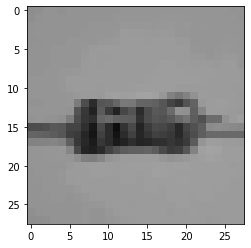

In [3]:
### Open and view image

# Use PIL to open the image and convert it to grayscale
img = PIL.Image.open(img_path)
img = img.convert('L')

# Convert image to Numpy array
img = np.asarray(img)

# Show dimensions and view array as image
print(img.shape)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

## Part 1: Convolution

Your assignment is to write a function that convolves the image array (stored in the `img` variable) with a given kernel and stride. Assume valid padding (e.g. no padding). Note that the kernel will be given as a 2D Numpy array.

You are welcome to use for loops in this exercise, as it helps to see what's going on in the convolution operation. Bonus points if you do it without for loops (caveat: bonus points don't mean anything in this course).

You may find some of the following Numpy operations to be helpful:

* [numpy.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)


In [4]:
### Convolution function

def convolve(img, kernel, stride):

  # Compute dimensions of output image
  out_height = math.floor((img.shape[0] - kernel.shape[0]) / stride) + 1
  out_width = math.floor((img.shape[1] - kernel.shape[1]) / stride) + 1
  
  # Create blank output image
  convolved_img = np.zeros((out_height, out_width))

  # >>> ENTER YOUR CODE HERE <<<
  

  # Round all elements, convert to integers, and clamp to values between 0 and 255
  convolved_img = np.rint(convolved_img).astype(int)
  convolved_img = np.clip(convolved_img, 0, 255)

  return convolved_img

(26, 26)


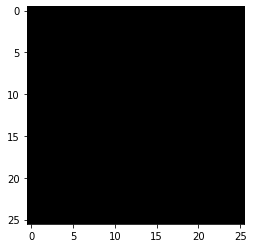

In [5]:
### Test 1: Gaussian blur filter

# Define kernel
kernel = np.array([[1/16, 2/16, 1/16],
                   [2/16, 4/16, 2/16],
                   [1/16, 2/16, 1/16]])

# Call your convolve function (with a stride of 1)
out_img = convolve(img, kernel, 1)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

(26, 26)


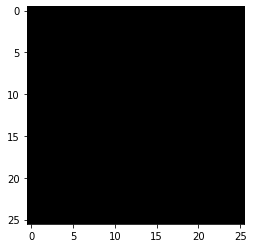

In [6]:
### Test 2: Edge detection

# Define kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Call your convolve function (with a stride of 1)
out_img = convolve(img, kernel, 1)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

(13, 13)


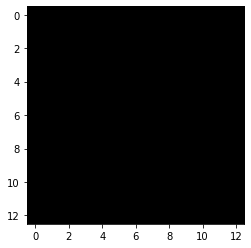

In [7]:
### Test 3: Sharpen with stride > 1

# Define kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Call your convolve function (with a stride of 2)
out_img = convolve(img, kernel, 2)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

## Part 2: Pooling

Your assignment is to write a function that performs max pooling on the input image array (stored in the `img` variable). Assume valid padding (e.g. no padding). Also, assume that the pool width determines the horizontal stride and the pool height determines the vertical stride.

You are welcome to use for loops in this exercise, as it helps to see what's going on in the convolution operation. Bonus points if you do it without for loops (caveat: bonus points don't mean anything in this course).

You may find some of the following Numpy operations to be helpful:

* [numpy.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [8]:
### Convolution function

def maxpooling(img, pool_height, pool_width):

  # Set stride amounts
  stride_y = pool_height
  stride_x = pool_width

  # Compute dimensions of output image
  out_height = math.floor((img.shape[0] - kernel.shape[0]) / stride_y) + 1
  out_width = math.floor((img.shape[1] - kernel.shape[1]) / stride_x) + 1
  
  # Create blank output image
  pooled_img = np.zeros((out_height, out_width))

  # >>> ENTER YOUR CODE HERE <<<
  

  # Round all elements, convert to integers, and clamp to values between 0 and 255
  pooled_img = np.rint(pooled_img).astype(int)
  pooled_img = np.clip(pooled_img, 0, 255)

  return pooled_img

(13, 9)


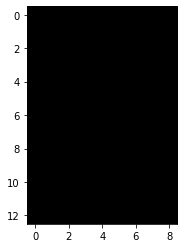

In [9]:
### Test 1: Max pool original image with pool size of (2, 3)

# Call your pooling function (with pool_size=(2, 3))
out_img = maxpooling(img, 2, 3)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

(12, 12)


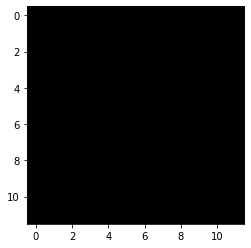

In [10]:
### Test 2: Detect edges and pool

# Define kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Call your convolve function (with a stride of 1)
convolved_img = convolve(img, kernel, 1)

# Call your pooling function (with pool_size=(2, 2))
out_img = maxpooling(convolved_img, 2, 2)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)